# Sample Analysis

### Goal of this section is to analyse a small sample set of 5 data points

In [ ]:
install.packages("mlbench")
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ...

In [ ]:
library(mlbench)
library(moments)
library(dplyr, warn.conflicts = FALSE)

In [ ]:
data("BostonHousing")

In [ ]:
dim(BostonHousing)

### Check for missing data and handle it.


Notice below that we do not have any missing data

In [5]:
BostonHousing[!complete.cases(BostonHousing),]

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


### Prepare the dataset

Let's separate features from the target, as we want to analyse the features. 

Note that we can include the categorical column chas in the aggregation as chas is a binary values column with 0 or 1 as values. We just need to convert the column's data type from factor to integer, we can perform computations on it like a numeric column.

In [4]:
bostonhousing_features <- BostonHousing[1:13]
bostonhousing_features$chas = as.numeric(as.character(bostonhousing_features$chas))
head(bostonhousing_features)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Let's random select our sample of 5 data points and analyze them

In [6]:
set.seed(42)
sample = sample_n(bostonhousing_features, 5)
sample

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
466,3.16360,0,18.10,0,0.655,5.759,48.2,3.0665,24,666,20.2,334.40,14.13
441,22.05110,0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11
389,14.33370,0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62
261,0.54011,20,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,392.80,9.59
359,5.20177,0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48


#### Let's Visualize our samples in a Heatmap 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


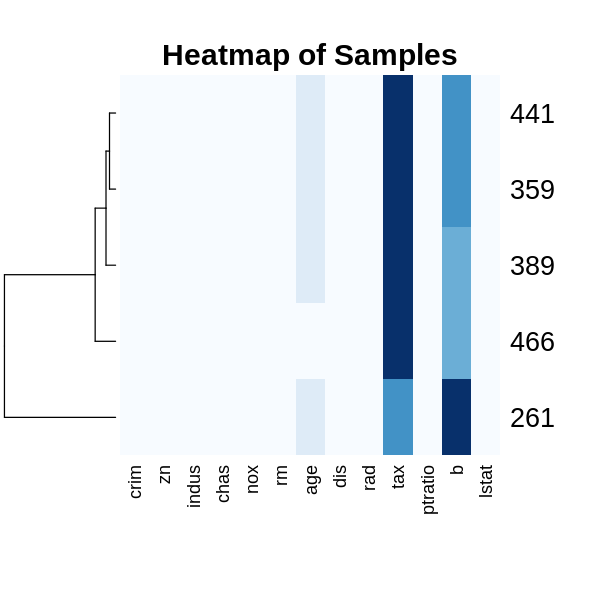

In [26]:
##heatmap(as.matrix(sample))

install.packages("RColorBrewer")
library("RColorBrewer")
library("repr")
options(repr.plot.width=5, repr.plot.height=5)
heatmap(as.matrix(sample),Colv=NA,col=brewer.pal(9,"Blues"),main = "Heatmap of Samples")


#### Observations : Looking at the data and heatmap of the samples, it seems that

- the values for tax and b are at a much higher value compared to other features, and

- the values for zn and chas are 0 for 4/5 instances.

- features zn, indus, chas, rad, tax, ptratio are contant for tracts 466, 441, 389 & 359. 

- Tract 261 seems almost like an outlier compared to the values of other 4 tracts.

### Let's compute Z-Scores for the Samples and analyze them

Let's first compute some stats such as the Mean, Std Deviation & Skewness for the complete population.

In [5]:
stats = data.frame(feature=colnames(bostonhousing_features))
stats['mean_'] = sapply(bostonhousing_features, mean)
stats['sd_'] = sapply(bostonhousing_features, sd)
stats['skewness_'] = sapply(bostonhousing_features, skewness)
stats

feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


#### Let's Compute the stats for the sample

In [31]:
sample_stats = data.frame(feature=colnames(bostonhousing_features))
sample_stats['mean_'] = sapply(sample, mean)
sample_stats['mean_diff'] = sample_stats['mean_'] - stats$mean_
sample_stats['zscore'] = sample_stats['mean_diff'] / stats$sd_
sample_stats

feature,mean_,mean_diff,zscore
crim,9.058056,5.4445324,0.6329714
zn,4.000000,-7.3636364,-0.3157316
indus,15.274000,4.1372213,0.6030625
chas,0.200000,0.1308300,0.5150910
nox,0.702400,0.1477049,1.2746626
rm,5.957400,-0.3272344,-0.4657364
age,81.160000,12.5850988,0.4470909
dis,2.271400,-1.5236427,-0.7235767
rad,20.200000,10.6505929,1.2231854
tax,585.600000,177.3628458,1.0523667


From the above mean_diff_, you can tell that sample mean for **_age_**, **_tax_** and **_b_** show a big deviation from the population mean.


Just comparing the raw mean of the sample and the complete population doesn't really give us an exact picture, unless we convert this difference to units of Standard Deviation. This metrix is call the z-score and is given by the formula 

``` (Sample Mean - Population Mean)/ Population Std Deviation ```


Z-score, above represents the distance between the sample mean and the population mean in units of standard deviation. Let's plot and visualize the zscore to see how the samples compare to the population.

In [41]:
sample_stats = sample_stats[c(1, 4)]


Using feature as id variables


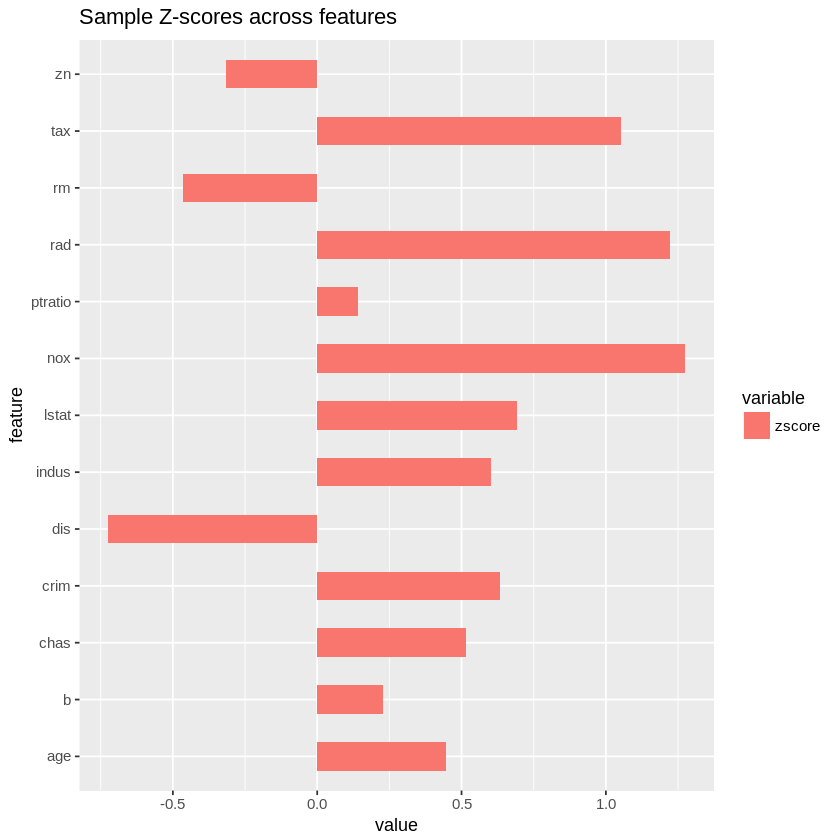

In [45]:
library(reshape2)
library(ggplot2)

#ggplot(melt(summary_vals), aes(x = feature, y = value, fill = variable)) +  of Mean for each feature
 #   geom_bar(stat = "identity", width=0.5, position = "dodge")
options(repr.plot.width=7, repr.plot.height=7)
ggplot(melt(sample_stats), aes(fill=variable, y=value, x=feature)) +
    geom_bar(stat="identity", width=0.5, position="dodge") +
     coord_flip() +
     ggtitle("Sample Z-scores across features")


#### Observations: Looking at the Z-Scores of the samples, 

- z-scores or zn, rm & dis are below the mean, the z-scores of the rest of the features are above the mean.

- z-score of ptratio (pupil teacher ratio) shows the least deviation from the population mean.

- z-score of nox (Nitrogen Oxide Concentration) shows the most deviation from the population mean.

